# kunnen we betalen?

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#laad het bestand
def read_file(f):
    """functie om de file te lezen en in dataframe te zetten"""
    df = pd.read_csv(f, delimiter = ';')
    return df

######################################
# vul hier de naam van het bestand in
f = 'data/kunnenclean.csv'
######################################

df = read_file(f)

In [3]:
######################################
# het stukje tussen df.<kolomnaam>.value_counts() is de kolomnaam
# lees de aantallen per antwoord uit
######################################
results = df.kunnen.value_counts()

In [4]:
# dit zijn de categorie namen voor het plaatje met kleuren
CATEGORY_NEW =   { 0: '',            #rood
                   1: '% nee',       #rood
                   2: '',            #oranje
                   3: '% weet niet', #blauw
                   4: '',            #grijs            
                   5: '% ja',        #lichtgroen
                   6: ''}            #donkergroen

In [5]:
######################################
# vullen van array y, houdt de nummers aan die hierboven staan
######################################
y = np.array([0,0,0,0,0,0,0])
y[5] = results['ja']
y[3] = results['weet niet']
y[1] = results['nee']
y_perc = np.array([i/y.sum()*100 for i in y])

In [6]:
# hier niets aan veranderen
def survey(results, category_names):
    """
    This funtion creates the graph. It uses the following parameters:
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.00,0.95, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 1))
    #ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    # remove all the ticks (both axes), and tick labels on the Y axis
    ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)


    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
      
        if i ==  2:  # 'neutraal'
            ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color='lightblue')
            xcenters = starts + widths / 2
        elif i ==  3:  # display bars with 'weet niet'
            ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color='lightgrey')
            xcenters = starts + widths / 2
        else:
            ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color) # color is red to green
            xcenters = starts + widths / 2

        #tekst color
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c != 0:
                ax.text(x, y, str(int(round(c))), ha='center', va='center',color=text_color)

    ax.legend(ncol=len(category_names), bbox_to_anchor=(-0.006, 1),loc='lower left', fontsize='small')
    return fig, ax


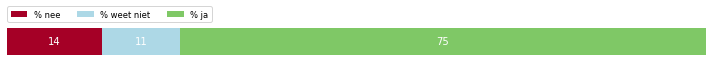

In [7]:
# hier wordt het plaatje gemaakt
results = {i : y_perc[1:] for i in range(0, 1)}
category_names = [CATEGORY_NEW[i] for i in CATEGORY_NEW][1:]
fig, ax = survey(results, category_names)
plt.tight_layout()
plt.savefig(f[:-4])
